In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score
import matplotlib.pyplot as plt

C:\Users\enith\AppData\Local\Temp\ipykernel_22812\2767579618.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data = pd.read_csv("D:/data_set.csv")

In [3]:
X=features = Data[['Year', 'Latitude', 'Longitude']]
Y=target = Data['Elevation']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [6]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred=predictions = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.015182236055154568
R-squared: 0.886567646297935


In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

MAE: 0.06233863885665424


In [10]:
#use for comparing between models
num_predictors = X.shape[1]  
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-num_predictors-1)
print('Adjusted R^2:', adjusted_r2)

Adjusted R^2: 0.886421908798532


In [11]:
with open('rf_r2.txt', 'w') as f:
    f.write(str(adjusted_r2))

In [12]:
#target variance is measured
evs = explained_variance_score(y_test,predictions)
print("Explained variance score:", evs)

Explained variance score: 0.8865774968418069


In [13]:
#accuracy (error percentage)
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)



MAPE: 18.616274581663017


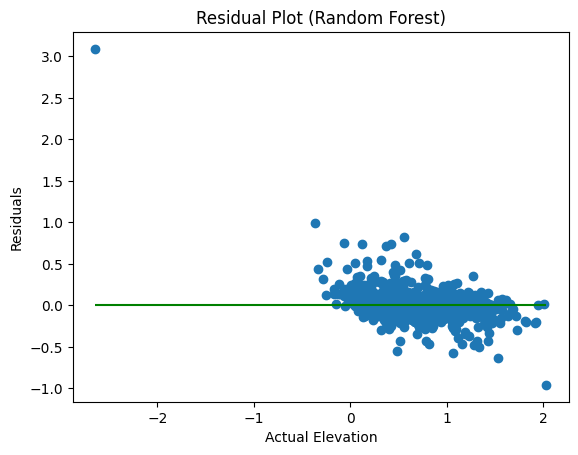

In [14]:
residuals = predictions - y_test
import pandas as pd
pd.DataFrame(residuals).to_csv("resi_rf.csv", index=False)
sorted_idx = y_test.sort_values().index
y_test = y_test.loc[sorted_idx]
residuals = residuals[sorted_idx] 
plt.scatter(y_test, residuals)
plt.hlines(0, y_test.min(), y_test.max(), colors='green')
plt.xlabel('Actual Elevation')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

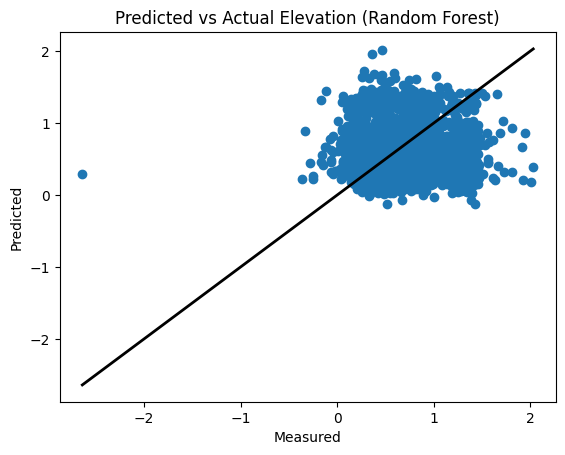

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Predicted vs Actual Elevation (Random Forest)')
plt.show()